## Create a Master DB
- Author
- Gender
- Total publications
- Academic age
- Number of collaborators in a lifetime
- Number of collaborators of the first collaborator (advisor)
- Number of papers of the first collaborator (advisor)
- Year of the first publication
- Year of the last publication
- Shannon’s entropy

In [2]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx 
%matplotlib inline

In [3]:
# Load Raw Data mapped to Gender
df_raw = pd.read_csv('../../01 Data/03 Consolidated/authors_with_gender_v99.csv')

In [4]:
df_raw

,paper_id,date,name,fname,lname,affiliationIds,new_fname,norm_fname,gender,year
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],Tomoyuki,tomoyuki,NaN,2018
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],Yuichiro,yuichiro,NaN,2018
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],Makoto,makoto,male,2018
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],Takayuki,takayuki,male,2018
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],Hayato,hayato,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,Mikhail,mikhail,male,2011
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,A.,a,NaN,2011
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,F.,f,NaN,2011
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,A.,a,NaN,2011


In [5]:
# # QC
# df_raw[df_raw.name=='Abbas Ali Saberi']

### Data contains duplicacy at affil level, as 1 author associated to multiple affils

In [6]:
df_raw[df_raw.paper_id == '10.1103/RevModPhys.86.855'].head(4)

,paper_id,date,name,fname,lname,affiliationIds,new_fname,norm_fname,gender,year
302825,10.1103/RevModPhys.86.855,2014-07-11,T. Jungwirth,T.,Jungwirth,a1,T.,t,NaN,2014
302826,10.1103/RevModPhys.86.855,2014-07-11,T. Jungwirth,T.,Jungwirth,a2,T.,t,NaN,2014
302827,10.1103/RevModPhys.86.855,2014-07-11,J. Wunderlich,J.,Wunderlich,a3,J.,j,NaN,2014
302828,10.1103/RevModPhys.86.855,2014-07-11,J. Wunderlich,J.,Wunderlich,a4,J.,j,NaN,2014


In [7]:
df_main = df_raw.drop_duplicates(['paper_id','date','name','gender', 'year'], keep='first')

In [8]:
df_main[df_main.paper_id == '10.1103/RevModPhys.86.855'].head(4)

,paper_id,date,name,fname,lname,affiliationIds,new_fname,norm_fname,gender,year
302825,10.1103/RevModPhys.86.855,2014-07-11,T. Jungwirth,T.,Jungwirth,a1,T.,t,NaN,2014
302827,10.1103/RevModPhys.86.855,2014-07-11,J. Wunderlich,J.,Wunderlich,a3,J.,j,NaN,2014
302829,10.1103/RevModPhys.86.855,2014-07-11,V. Novák,V.,Novák,a5,V.,v,NaN,2014
302830,10.1103/RevModPhys.86.855,2014-07-11,K. Olejník,K.,Olejník,a5,K.,k,NaN,2014


***Visulaize Yearly Distribution***

In [9]:
# # Yearly Distribution of Gendered Data (no nans in gender)
# fig = px.histogram(df_main[~df_main.gender.isnull()], 
#                    x="year", 
#                    color='gender', 
#                    marginal='box', 
#                    hover_data=df_main.columns)
# # fig.update_layout(barmode='group')
# fig.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

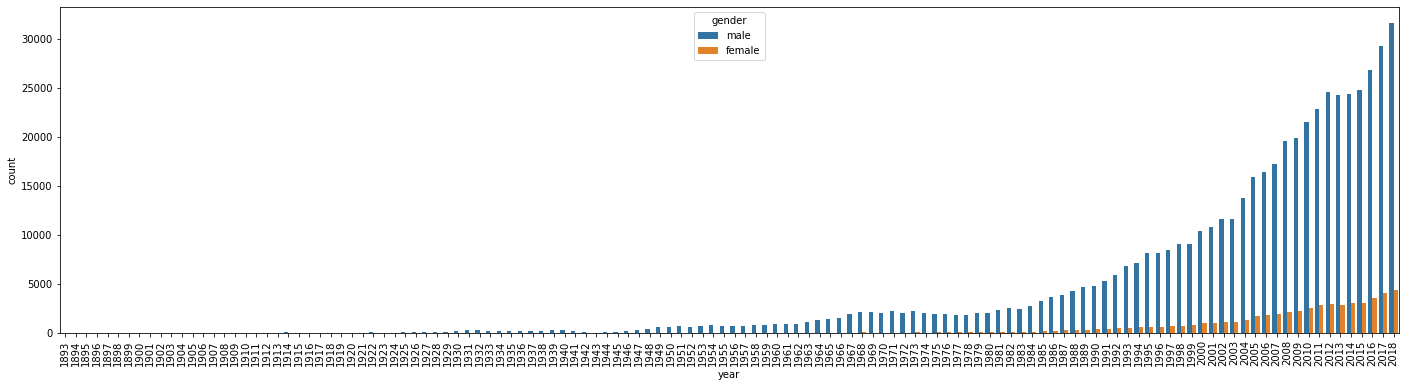

In [10]:
plt.figure(figsize=(24,6))
sns.countplot(data =df_main[~df_main.gender.isnull()], x= 'year', hue='gender')
plt.xticks(rotation=90)

***To keep Non-Genderized data, fill it witjh 'NA'***

In [11]:
df_main.gender.fillna('NA', inplace=True)

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Rollup Data at Author-Gender Level

In [12]:
df = df_main.groupby(['name', 'gender'], as_index = False).agg({'paper_id':'count', 'year':[np.min,np.max]})

In [13]:
df

name gender paper_id  year      
                                          count  amin  amax
0        \nDUET Collaboration\n     NA        1  2017  2017
1       \nSπRIT Collaboration\n     NA        1  2017  2017
2                       Arianto     NA        1  2011  2011
3                     Riazuddin     NA        1  2011  2011
4               A. M. Balbashov     NA        1  2004  2004
...                         ...    ...      ...   ...   ...
448616       χQCD Collaboration     NA       14  2009  2018
448617            А. N. Lodygin     NA        3  2016  2018
448618            О. S. Vaulina     NA        1  2015  2015
448619                  Ṣ. Uǧur     NA        1  2015  2015
448620           Å. M. Lindberg     NA        1  1997  1997

[448621 rows x 5 columns]

In [14]:
df.gender.value_counts()

NA        305917
male      125072
female     17632
Name: gender, dtype: int64

##### Age/Career Length of Authors
If author only active for 1 year, then age = 1

In [15]:
df['age'] = df['year']['amax'] - df['year']['amin'] + 1

In [16]:
df.head(5)

name gender paper_id  year       age
                                     count  amin  amax    
0   \nDUET Collaboration\n     NA        1  2017  2017   1
1  \nSπRIT Collaboration\n     NA        1  2017  2017   1
2                  Arianto     NA        1  2011  2011   1
3                Riazuddin     NA        1  2011  2011   1
4          A. M. Balbashov     NA        1  2004  2004   1

##### Rename columns for readability

In [17]:
df_new = pd.DataFrame()
df_new['name'] = df[('name', '')]
df_new['gender'] = df[('gender', '')]
df_new['paper_count'] = df[('paper_id', 'count')]
df_new['start_yr'] = df[('year', 'amin')]
df_new['end_yr'] = df[('year', 'amax')]
df_new['age'] = df[('age', '')]

df = df_new
df.head(5)

,name,gender,paper_count,start_yr,end_yr,age
0,\nDUET Collaboration\n,NA,1,2017,2017,1
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1
2,Arianto,NA,1,2011,2011,1
3,Riazuddin,NA,1,2011,2011,1
4,A. M. Balbashov,NA,1,2004,2004,1


In [18]:
# df_new

In [19]:
# Sanity Check
print(df.gender.value_counts())
print('Female Gender % from total Gendered Data: {0:0.1%}'.format(df[df['gender']=='female'].shape[0]/df[df['gender']!='NA'].shape[0]))

NA        305917
male      125072
female     17632
Name: gender, dtype: int64
Female Gender % from total Gendered Data: 12.4%


In [20]:
# # Gender Age Distribution
# fig = px.histogram(df[df.gender!='NA'][df.age > 1], x="age", color="gender",marginal="box", #violin
#                    hover_data=df.columns)
# # can comment out grouping to see stacked histogram
# fig.update_layout(barmode='group')
# fig.show()

In [21]:
# # Gender Age Distribution
# fig = px.histogram(df[df.gender!='NA'][df.age > 1], x="age", color="gender",marginal="box", #violin
#                    hover_data=df.columns)
# # can comment out grouping to see stacked histogram
# fig.update_layout(barmode='group')
# fig.show()

### Collaborator DB Prep
- Merge author-gender db back to main (new: df_db)
- Make BOOL columsn for is_male, is_female
- roll up db at paper_id level to get toatl authors, total age etc
- again merge this paper db to main db, to get collab stats

In [22]:
df['isMale'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['isFemale'] = df['gender'].apply(lambda x: 1 if x == 'female' else 0)
df['isgenderNA'] = df['gender'].apply(lambda x: 1 if x == 'NA' else 0)

In [23]:
df

,name,gender,paper_count,start_yr,end_yr,age,isMale,isFemale,isgenderNA
0,\nDUET Collaboration\n,NA,1,2017,2017,1,0,0,1
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,0,0,1
2,Arianto,NA,1,2011,2011,1,0,0,1
3,Riazuddin,NA,1,2011,2011,1,0,0,1
4,A. M. Balbashov,NA,1,2004,2004,1,0,0,1
...,...,...,...,...,...,...,...,...,...
448616,χQCD Collaboration,NA,14,2009,2018,10,0,0,1
448617,А. N. Lodygin,NA,3,2016,2018,3,0,0,1
448618,О. S. Vaulina,NA,1,2015,2015,1,0,0,1
448619,Ṣ. Uǧur,NA,1,2015,2015,1,0,0,1


In [24]:
df_db = pd.merge(df_main, df, how='left', on='name')

In [25]:
# df_db

In [26]:
# Clean up db
df_db.drop(columns=['fname', 'lname', 'norm_fname', 'gender_x', 'date'], inplace=True)

In [27]:
df_db

,paper_id,name,affiliationIds,new_fname,year,gender_y,paper_count,start_yr,end_yr,age,isMale,isFemale,isgenderNA
0,10.1103/PhysRevApplied.9.039901,Tomoyuki Sasaki,[],Tomoyuki,2018,NA,5,2011,2018,8,0,0,1
1,10.1103/PhysRevApplied.9.039901,Yuichiro Ando,[],Yuichiro,2018,NA,10,2012,2018,7,0,0,1
2,10.1103/PhysRevApplied.9.039901,Makoto Kameno,[],Makoto,2018,male,4,2012,2018,7,1,0,0
3,10.1103/PhysRevApplied.9.039901,Takayuki Tahara,[],Takayuki,2018,male,3,2014,2018,5,1,0,0
4,10.1103/PhysRevApplied.9.039901,Hayato Koike,[],Hayato,2018,NA,4,2014,2018,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196466,10.1103/PhysRevSTAB.14.014001,Mikhail Zobov,a2,Mikhail,2011,male,4,2003,2011,9,1,0,0
2196467,10.1103/PhysRevSTAB.14.090401,A. Lorusso,a1,A.,2011,NA,2,2011,2013,3,0,0,1
2196468,10.1103/PhysRevSTAB.14.090401,F. Gontad,a1,F.,2011,NA,2,2011,2013,3,0,0,1
2196469,10.1103/PhysRevSTAB.14.090401,A. Perrone,a1,A.,2011,NA,4,2006,2013,8,0,0,1


***Rollup at paper_id level to get paper stats***

In [28]:
df_ppr = df_db.groupby(['paper_id'], as_index=False).agg({
    'name':'count', 'paper_count':'sum', 'age':'sum', 'isMale':'sum', 'isFemale':'sum', 'isgenderNA':'sum'
})

In [29]:
# df_ppr

In [30]:
# Rename to get consistent names
df_ppr.rename(columns={
    'name':'tot_auth', 'paper_count':'tot_auth_papers', 'age':'tot_auth_age', 
    'isMale':'tot_M_auth','isFemale':'tot_F_auth','isgenderNA':'tot_NA_auth'
}, inplace=True)

In [31]:
df_ppr

,paper_id,tot_auth,tot_auth_papers,tot_auth_age,tot_M_auth,tot_F_auth,tot_NA_auth
0,10.1103/PhysRev.1.124,1,2,14,1,0,0
1,10.1103/PhysRev.1.141,1,2,2,0,0,1
2,10.1103/PhysRev.1.154,1,1,1,1,0,0
3,10.1103/PhysRev.1.16,1,1,1,1,0,0
4,10.1103/PhysRev.1.161,1,3,2,0,0,1
...,...,...,...,...,...,...,...
626322,10.1103/RevModPhys.90.045002,2,146,34,1,0,1
626323,10.1103/RevModPhys.90.045003,1,25,42,1,0,0
626324,10.1103/RevModPhys.90.045004,3,68,79,3,0,0
626325,10.1103/RevModPhys.90.045005,4,25,19,0,0,4


***Merge back to main db***

In [32]:
df_db = pd.merge(df_db, df_ppr, how='left', on='paper_id')

In [33]:
df_db

,paper_id,name,affiliationIds,new_fname,year,gender_y,paper_count,start_yr,end_yr,age,isMale,isFemale,isgenderNA,tot_auth,tot_auth_papers,tot_auth_age,tot_M_auth,tot_F_auth,tot_NA_auth
0,10.1103/PhysRevApplied.9.039901,Tomoyuki Sasaki,[],Tomoyuki,2018,NA,5,2011,2018,8,0,0,1,8,108,102,3,0,5
1,10.1103/PhysRevApplied.9.039901,Yuichiro Ando,[],Yuichiro,2018,NA,10,2012,2018,7,0,0,1,8,108,102,3,0,5
2,10.1103/PhysRevApplied.9.039901,Makoto Kameno,[],Makoto,2018,male,4,2012,2018,7,1,0,0,8,108,102,3,0,5
3,10.1103/PhysRevApplied.9.039901,Takayuki Tahara,[],Takayuki,2018,male,3,2014,2018,5,1,0,0,8,108,102,3,0,5
4,10.1103/PhysRevApplied.9.039901,Hayato Koike,[],Hayato,2018,NA,4,2014,2018,5,0,0,1,8,108,102,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196466,10.1103/PhysRevSTAB.14.014001,Mikhail Zobov,a2,Mikhail,2011,male,4,2003,2011,9,1,0,0,4,9,16,4,0,0
2196467,10.1103/PhysRevSTAB.14.090401,A. Lorusso,a1,A.,2011,NA,2,2011,2013,3,0,0,1,4,9,15,0,0,4
2196468,10.1103/PhysRevSTAB.14.090401,F. Gontad,a1,F.,2011,NA,2,2011,2013,3,0,0,1,4,9,15,0,0,4
2196469,10.1103/PhysRevSTAB.14.090401,A. Perrone,a1,A.,2011,NA,4,2006,2013,8,0,0,1,4,9,15,0,0,4


### Make Collab Stats & Final DB

In [34]:
df_db['tot_collab'] = df_db['tot_auth'] - 1
df_db['tot_collab_age'] = df_db['tot_auth_age'] - df_db['age']
df_db['tot_collab_pprs'] = df_db['tot_auth_papers'] - df_db['paper_count']
df_db['tot_M_collab'] = df_db['tot_M_auth'] - df_db['isMale']
df_db['tot_F_collab'] = df_db['tot_F_auth'] - df_db['isFemale']
df_db['tot_NA_collab'] = df_db['tot_NA_auth'] - df_db['isgenderNA']

In [35]:
df_db

,paper_id,name,affiliationIds,new_fname,year,gender_y,paper_count,start_yr,end_yr,age,...,tot_auth_age,tot_M_auth,tot_F_auth,tot_NA_auth,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab
0,10.1103/PhysRevApplied.9.039901,Tomoyuki Sasaki,[],Tomoyuki,2018,NA,5,2011,2018,8,...,102,3,0,5,7,94,103,3,0,4
1,10.1103/PhysRevApplied.9.039901,Yuichiro Ando,[],Yuichiro,2018,NA,10,2012,2018,7,...,102,3,0,5,7,95,98,3,0,4
2,10.1103/PhysRevApplied.9.039901,Makoto Kameno,[],Makoto,2018,male,4,2012,2018,7,...,102,3,0,5,7,95,104,2,0,5
3,10.1103/PhysRevApplied.9.039901,Takayuki Tahara,[],Takayuki,2018,male,3,2014,2018,5,...,102,3,0,5,7,97,105,2,0,5
4,10.1103/PhysRevApplied.9.039901,Hayato Koike,[],Hayato,2018,NA,4,2014,2018,5,...,102,3,0,5,7,97,104,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196466,10.1103/PhysRevSTAB.14.014001,Mikhail Zobov,a2,Mikhail,2011,male,4,2003,2011,9,...,16,4,0,0,3,7,5,3,0,0
2196467,10.1103/PhysRevSTAB.14.090401,A. Lorusso,a1,A.,2011,NA,2,2011,2013,3,...,15,0,0,4,3,12,7,0,0,3
2196468,10.1103/PhysRevSTAB.14.090401,F. Gontad,a1,F.,2011,NA,2,2011,2013,3,...,15,0,0,4,3,12,7,0,0,3
2196469,10.1103/PhysRevSTAB.14.090401,A. Perrone,a1,A.,2011,NA,4,2006,2013,8,...,15,0,0,4,3,7,5,0,0,3


In [36]:
df_db.columns

Index(['paper_id', 'name', 'affiliationIds', 'new_fname', 'year', 'gender_y',
       'paper_count', 'start_yr', 'end_yr', 'age', 'isMale', 'isFemale',
       'isgenderNA', 'tot_auth', 'tot_auth_papers', 'tot_auth_age',
       'tot_M_auth', 'tot_F_auth', 'tot_NA_auth', 'tot_collab',
       'tot_collab_age', 'tot_collab_pprs', 'tot_M_collab', 'tot_F_collab',
       'tot_NA_collab'],
      dtype='object')

In [37]:
# df_db.to_csv('../../01 Data/03 Consolidated/paper_and_name_lvl_data.csv', index=False)

#### Rollup ta author level

In [38]:
df_auth = df_db.groupby(['name', 'gender_y', 'age','start_yr', 'end_yr', 'paper_count'], as_index=False).agg({
    'tot_collab':'sum', 'tot_collab_age':'sum', 'tot_collab_pprs':'sum', 'tot_M_collab':'sum', 
    'tot_F_collab':'sum', 'tot_NA_collab':'sum', 'tot_collab_pprs':'sum', 
})

In [39]:
df_auth

,name,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab
0,\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,0,22
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,0,18
2,Arianto,NA,1,2011,2011,1,4,6,6,0,0,4
3,Riazuddin,NA,1,2011,2011,1,1,29,25,0,0,1
4,A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
448616,χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,2,59
448617,А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,0,44
448618,О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,0,1
448619,Ṣ. Uǧur,NA,1,2015,2015,1,5,94,169,0,0,5


In [40]:
df_auth.gender_y.value_counts()

NA        305917
male      125072
female     17632
Name: gender_y, dtype: int64

***Quick Summary Stats***

In [41]:
print('Female: Avg Age (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['age'])))
print('Male: Avg Age (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['age'])))

Female: Avg Age (outliers not removed): 4.0
Male: Avg Age (outliers not removed): 5.5


Text(0.5, 1.0, 'Female Career Length Log-Distribution')

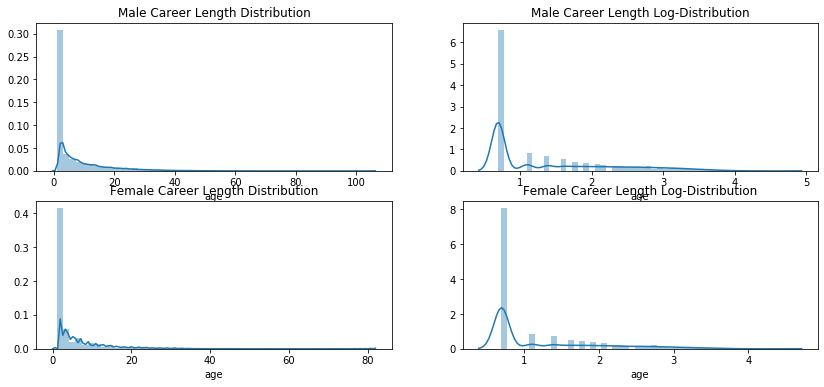

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(221)
sns.distplot(df_auth[df_auth['gender_y']=='male']['age'])
plt.title('Male Career Length Distribution')
plt.subplot(222)
sns.distplot(df_auth[df_auth['gender_y']=='male']['age'].apply(np.log1p))
plt.title('Male Career Length Log-Distribution')

plt.subplot(223)
sns.distplot(df_auth[df_auth['gender_y']=='female']['age'])
plt.title('Female Career Length Distribution')
plt.subplot(224)
sns.distplot(df_auth[df_auth['gender_y']=='female']['age'].apply(np.log1p))
plt.title('Female Career Length Log-Distribution')

In [43]:
# Use Code: for outlier removal

# Make new male db

# Old Results
male_db = df_auth[df_auth.gender_y=='male']
print('Males: mean=%.1f stdv=%.1f' % (np.mean(male_db.age),  np.std(male_db.age)))

# New Results
male_db = male_db[np.abs(male_db.age - male_db.age.mean()) <= (3 * male_db.age.std())]
print('Males: mean=%.1f stdv=%.1f' % (np.mean(male_db.age),  np.std(male_db.age)))

# Old Results
female_db = df_auth[df_auth.gender_y=='female']
print('Females: mean=%.1f stdv=%.1f' % (np.mean(female_db.age),  np.std(female_db.age)))

# New Results
female_db = female_db[np.abs(female_db.age - female_db.age.mean()) <= (3 * female_db.age.std())]
print('Females: mean=%.1f stdv=%.1f' % (np.mean(female_db.age),  np.std(female_db.age)))

Males: mean=5.5 stdv=8.2
Males: mean=4.7 stdv=6.2
Females: mean=4.0 stdv=6.1
Females: mean=3.3 stdv=4.3


Text(0.5, 1.0, 'Female Career Length Log-Distribution')

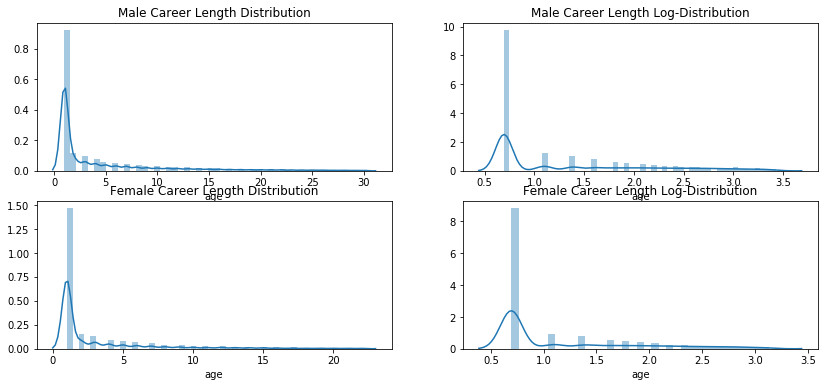

In [44]:
# Use Code: for outlier removal
plt.figure(figsize=(14,6))
plt.subplot(221)
sns.distplot(male_db['age'])
plt.title('Male Career Length Distribution')
plt.subplot(222)
sns.distplot(male_db['age'].apply(np.log1p))
plt.title('Male Career Length Log-Distribution')

plt.subplot(223)
sns.distplot(female_db['age'])
plt.title('Female Career Length Distribution')
plt.subplot(224)
sns.distplot(female_db['age'].apply(np.log1p))
plt.title('Female Career Length Log-Distribution')

In [45]:
print('Female: Avg Paper Count (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['paper_count'])))
print('Male: Avg Paper Count (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['paper_count'])))

Female: Avg Paper Count (outliers not removed): 3.2
Male: Avg Paper Count (outliers not removed): 4.3


In [46]:
print('Female: Avg Publication Rate (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['paper_count']/df_auth[df_auth['gender_y']=='female']['age'])))
print('Male: Avg Publication Rate (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['paper_count']/df_auth[df_auth['gender_y']=='male']['age'])))

Female: Avg Publication Rate (outliers not removed): 1.0
Male: Avg Publication Rate (outliers not removed): 1.0


***Collab Stats***

In [47]:
print('Female: Avg Collab Count (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['tot_collab'])))
print('Male: Avg Collab Count (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['tot_collab'])))

Female: Avg Collab Count (outliers not removed): 11.5
Male: Avg Collab Count (outliers not removed): 13.0


In [48]:
print('Female: Avg Collab Age (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['tot_collab_age']/df_auth[df_auth['gender_y']=='female']['tot_collab'])))
print('Male: Avg Collab Age (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['tot_collab_age']/df_auth[df_auth['gender_y']=='male']['tot_collab'])))

Female: Avg Collab Age (outliers not removed): 13.1
Male: Avg Collab Age (outliers not removed): 13.6


In [49]:
print('Female: Avg Collaborators #papers (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='female']['tot_collab_pprs']/df_auth[df_auth['gender_y']=='female']['tot_collab'])))
print('Male: Avg Collaborators #papers (outliers not removed): {0:0.1f}'.format(np.mean(df_auth[df_auth['gender_y']=='male']['tot_collab_pprs']/df_auth[df_auth['gender_y']=='male']['tot_collab'])))

Female: Avg Collaborators #papers (outliers not removed): 17.3
Male: Avg Collaborators #papers (outliers not removed): 17.4


### First Collaborators (possible Advisors)

In [50]:
df_auth['year'] = df_auth['start_yr']
df_auth

,name,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab,year
0,\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,0,22,2017
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,0,18,2017
2,Arianto,NA,1,2011,2011,1,4,6,6,0,0,4,2011
3,Riazuddin,NA,1,2011,2011,1,1,29,25,0,0,1,2011
4,A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,0,7,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448616,χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,2,59,2009
448617,А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,0,44,2016
448618,О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,0,1,2015
448619,Ṣ. Uǧur,NA,1,2015,2015,1,5,94,169,0,0,5,2015


***Bring the id of the First paper of an author***

In [51]:
df_main_ppr = df_main[['paper_id', 'year', 'name']]

In [52]:
df_main_ppr.sort_values('year', inplace=True)

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_main_ppr

,paper_id,year,name
293852,10.1103/PhysRevSeriesI.1.59,1893,Frederick Bedell
293870,10.1103/PhysRevSeriesI.1.166,1893,Ernest Merritt
293855,10.1103/PhysRevSeriesI.1.161,1893,G. W. Pierce
293850,10.1103/PhysRevSeriesI.1.95,1893,Benjamin W. Snow
293856,10.1103/PhysRevSeriesI.1.177,1893,Frederick Bedell
...,...,...,...
897922,10.1103/PhysRevB.98.085106,2018,Jinyoung Lim
897921,10.1103/PhysRevB.98.245129,2018,Youichi Yanase
897920,10.1103/PhysRevB.98.245129,2018,Hikaru Watanabe
897933,10.1103/PhysRevB.98.214433,2018,J. P. Clancy


In [54]:
df_auth_ppr = pd.merge(df_auth, df_main_ppr, how='left', on=['name', 'year'])

In [55]:
df_auth_ppr

,name,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab,year,paper_id
0,\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,0,22,2017,10.1103/PhysRevC.95.045203
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,0,18,2017,10.1103/PhysRevC.95.044614
2,Arianto,NA,1,2011,2011,1,4,6,6,0,0,4,2011,10.1103/PhysRevD.84.044008
3,Riazuddin,NA,1,2011,2011,1,1,29,25,0,0,1,2011,10.1103/PhysRevD.84.017302
4,A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,0,7,2004,10.1103/PhysRevB.70.024414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513718,χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,2,59,2009,10.1103/PhysRevD.80.094503
513719,А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,0,44,2016,10.1103/PhysRevB.94.075208
513720,О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,0,1,2015,10.1103/PhysRevE.92.042155
513721,Ṣ. Uǧur,NA,1,2015,2015,1,5,94,169,0,0,5,2015,10.1103/PhysRevB.92.054510


***DB with Authors and thier 1st paper ids***

In [56]:
# Lots of duplicates, as 1 paper id has multiple author names so gets joined multiple times
df_auth_uniq = df_auth_ppr.drop_duplicates(
    ['name','year','gender_y','age','start_yr', 'end_yr', 'paper_count'], keep='first')

In [57]:
# Reset Index
df_auth_uniq.reset_index(drop=True, inplace=True)

In [58]:
# Paper_id here refers to the first paper of that author
df_auth_uniq.rename(columns={'paper_id':'first_papers_id'}, inplace=True)

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df_auth_uniq

,name,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab,year,first_papers_id
0,\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,0,22,2017,10.1103/PhysRevC.95.045203
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,0,18,2017,10.1103/PhysRevC.95.044614
2,Arianto,NA,1,2011,2011,1,4,6,6,0,0,4,2011,10.1103/PhysRevD.84.044008
3,Riazuddin,NA,1,2011,2011,1,1,29,25,0,0,1,2011,10.1103/PhysRevD.84.017302
4,A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,0,7,2004,10.1103/PhysRevB.70.024414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448616,χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,2,59,2009,10.1103/PhysRevD.80.094503
448617,А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,0,44,2016,10.1103/PhysRevB.94.075208
448618,О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,0,1,2015,10.1103/PhysRevE.92.042155
448619,Ṣ. Uǧur,NA,1,2015,2015,1,5,94,169,0,0,5,2015,10.1103/PhysRevB.92.054510


### DB at paper_id level w/ author names as LIST
- rollup main db at paper_level
- aggregate names as list
- lookup stats of each author (age, paper, count)

In [60]:
df_lists = df_db[['paper_id', 'name']].groupby(['paper_id'], as_index=False).agg(lambda x: list(x))

In [61]:
df_lists

,paper_id,name
0,10.1103/PhysRev.1.124,[Lachlan Gilchrist]
1,10.1103/PhysRev.1.141,[E. E. Somermeier]
2,10.1103/PhysRev.1.154,[Chester A. Butman]
3,10.1103/PhysRev.1.16,[David W. Cornelius.]
4,10.1103/PhysRev.1.161,[R. D. Carmichael]
...,...,...
626322,10.1103/RevModPhys.90.045002,"[Gianfranco Bertone, Dan Hooper]"
626323,10.1103/RevModPhys.90.045003,[Edward Witten]
626324,10.1103/RevModPhys.90.045004,"[Antal Jákli, Oleg D. Lavrentovich, Jonathan V..."
626325,10.1103/RevModPhys.90.045005,"[M. G. Kozlov, M. S. Safronova, J. R. Crespo L..."


In [62]:
df_lists.rename(columns={'name':'list_of_authors'}, inplace=True)

In [63]:
df_lists.tail(5)

,paper_id,list_of_authors
626322,10.1103/RevModPhys.90.045002,"[Gianfranco Bertone, Dan Hooper]"
626323,10.1103/RevModPhys.90.045003,[Edward Witten]
626324,10.1103/RevModPhys.90.045004,"[Antal Jákli, Oleg D. Lavrentovich, Jonathan V..."
626325,10.1103/RevModPhys.90.045005,"[M. G. Kozlov, M. S. Safronova, J. R. Crespo L..."
626326,10.1103/RevModPhys.90.045006,"[Alexandre Nicolas, Ezequiel E. Ferrero, Kirst..."


In [102]:
pip install pyentrp

  Created wheel for pyentrp: filename=pyentrp-0.6.0-py2.py3-none-any.whl size=5039 sha256=1577d67acf58b87c0247d8f25ce6074b81033268ed92b8a99b3d4529429c93e9
  Stored in directory: /Users/adityagupta/Library/Caches/pip/wheels/44/a7/bf/aa8564feec418eb244eed9cd6cf06aba8e3e3591ee6037e0fd
Successfully built pyentrp
Note: you may need to restart the kernel to use updated packages.


In [103]:
from pyentrp import entropy as ent

In [119]:
a = ['C', 'C', 'C', 'C', 'W', 'W']

In [120]:
shanon = ent.shannon_entropy(a)

In [121]:
shanon

0.9182958340544896

***Convert author df to a dict to match stats against paper_id db***
- link: https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary

In [64]:
cpy_df_auth = df_auth.copy()

In [65]:
cpy_df_auth.set_index('name', drop=True, inplace=True)

In [66]:
cpy_df_auth

,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,tot_F_collab,tot_NA_collab,year
name,,,,,,,,,,,,
\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,0,22,2017
\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,0,18,2017
Arianto,NA,1,2011,2011,1,4,6,6,0,0,4,2011
Riazuddin,NA,1,2011,2011,1,1,29,25,0,0,1,2011
A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,0,7,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,2,59,2009
А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,0,44,2016
О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,0,1,2015


In [67]:
author_db_dict = cpy_df_auth.to_dict(orient="index")

In [68]:
author_db_dict

{'\nDUET Collaboration\n': {'gender_y': 'NA',
  'age': 1,
  'start_yr': 2017,
  'end_yr': 2017,
  'paper_count': 1,
  'tot_collab': 22,
  'tot_collab_age': 420,
  'tot_collab_pprs': 282,
  'tot_M_collab': 0,
  'tot_F_collab': 0,
  'tot_NA_collab': 22,
  'year': 2017},
 '\nSπRIT Collaboration\n': {'gender_y': 'NA',
  'age': 1,
  'start_yr': 2017,
  'end_yr': 2017,
  'paper_count': 1,
  'tot_collab': 18,
  'tot_collab_age': 297,
  'tot_collab_pprs': 544,
  'tot_M_collab': 0,
  'tot_F_collab': 0,
  'tot_NA_collab': 18,
  'year': 2017},
 '  Arianto': {'gender_y': 'NA',
  'age': 1,
  'start_yr': 2011,
  'end_yr': 2011,
  'paper_count': 1,
  'tot_collab': 4,
  'tot_collab_age': 6,
  'tot_collab_pprs': 6,
  'tot_M_collab': 0,
  'tot_F_collab': 0,
  'tot_NA_collab': 4,
  'year': 2011},
 '  Riazuddin': {'gender_y': 'NA',
  'age': 1,
  'start_yr': 2011,
  'end_yr': 2011,
  'paper_count': 1,
  'tot_collab': 1,
  'tot_collab_age': 29,
  'tot_collab_pprs': 25,
  'tot_M_collab': 0,
  'tot_F_collab':

***Map Author Data against List DB***

In [69]:
df_lists

,paper_id,list_of_authors
0,10.1103/PhysRev.1.124,[Lachlan Gilchrist]
1,10.1103/PhysRev.1.141,[E. E. Somermeier]
2,10.1103/PhysRev.1.154,[Chester A. Butman]
3,10.1103/PhysRev.1.16,[David W. Cornelius.]
4,10.1103/PhysRev.1.161,[R. D. Carmichael]
...,...,...
626322,10.1103/RevModPhys.90.045002,"[Gianfranco Bertone, Dan Hooper]"
626323,10.1103/RevModPhys.90.045003,[Edward Witten]
626324,10.1103/RevModPhys.90.045004,"[Antal Jákli, Oleg D. Lavrentovich, Jonathan V..."
626325,10.1103/RevModPhys.90.045005,"[M. G. Kozlov, M. S. Safronova, J. R. Crespo L..."


In [70]:
# Data does not have any paper_id with 0 authors

In [71]:
new_ltr = df_lists.copy()

###### Logic
- Make Lists of all collab features
- Add these independent lists to author list db
- We check before, if lengths are equal
- We check beofr if paper_id with empty name

In [72]:
#Co-author info
lst_author_genders = []
lst_author_ages = []
lst_author_num_pprs = []

#Co-author's co-author info
tot_count_coauth = []
tot_age_coauth = []
tot_pprs_coauth = []

for idx, val in enumerate(df_lists.list_of_authors):
    
    tmp_lst_author_genders = []
    tmp_lst_author_ages = []
    tmp_lst_author_num_pprs = []
    
    tmp_tot_count_coauth = []
    tmp_tot_age_coauth = []
    tmp_tot_pprs_coauth = []
    
    for nm in val:
        
        tmp_lst_author_genders.append(author_db_dict[nm]['gender_y'])
        tmp_lst_author_ages.append(author_db_dict[nm]['age'])
        tmp_lst_author_num_pprs.append(author_db_dict[nm]['paper_count'])
        
        tmp_tot_count_coauth.append(author_db_dict[nm]['tot_collab'])
        tmp_tot_age_coauth.append(author_db_dict[nm]['tot_collab_age'])
        tmp_tot_pprs_coauth.append(author_db_dict[nm]['tot_collab_pprs'])
    
    lst_author_genders.append(tmp_lst_author_genders)
    lst_author_ages.append(tmp_lst_author_ages)
    lst_author_num_pprs.append(tmp_lst_author_num_pprs)
    
    tot_count_coauth.append(tmp_tot_count_coauth)
    tot_age_coauth.append(tmp_tot_age_coauth)
    tot_pprs_coauth.append(tmp_tot_pprs_coauth)

In [73]:
series1 = pd.Series(lst_author_genders)
series2 = pd.Series(lst_author_ages)
series3 = pd.Series(lst_author_num_pprs)

series4 = pd.Series(tot_count_coauth)
series5 = pd.Series(tot_age_coauth)
series6 = pd.Series(tot_pprs_coauth)

In [74]:
df_lists['lst_author_genders'] = series1.values
df_lists['lst_author_ages'] = series2.values
df_lists['lst_author_num_pprs'] = series3.values

df_lists['tot_count_coauth'] = series4.values
df_lists['tot_age_coauth'] = series5.values
df_lists['tot_pprs_coauth'] = series6.values

In [75]:
df_lists

,paper_id,list_of_authors,lst_author_genders,lst_author_ages,lst_author_num_pprs,tot_count_coauth,tot_age_coauth,tot_pprs_coauth
0,10.1103/PhysRev.1.124,[Lachlan Gilchrist],[male],[14],[2],[0],[0],[0]
1,10.1103/PhysRev.1.141,[E. E. Somermeier],[NA],[2],[2],[0],[0],[0]
2,10.1103/PhysRev.1.154,[Chester A. Butman],[male],[1],[1],[0],[0],[0]
3,10.1103/PhysRev.1.16,[David W. Cornelius.],[male],[1],[1],[0],[0],[0]
4,10.1103/PhysRev.1.161,[R. D. Carmichael],[NA],[2],[3],[0],[0],[0]
...,...,...,...,...,...,...,...,...
626322,10.1103/RevModPhys.90.045002,"[Gianfranco Bertone, Dan Hooper]","[NA, male]","[17, 17]","[37, 109]","[99, 232]","[1141, 3747]","[1846, 7191]"
626323,10.1103/RevModPhys.90.045003,[Edward Witten],[male],[42],[25],[20],[468],[783]
626324,10.1103/RevModPhys.90.045004,"[Antal Jákli, Oleg D. Lavrentovich, Jonathan V...","[male, male, male]","[23, 25, 31]","[9, 24, 35]","[35, 82, 73]","[364, 804, 1165]","[453, 830, 1330]"
626325,10.1103/RevModPhys.90.045005,"[M. G. Kozlov, M. S. Safronova, J. R. Crespo L...","[NA, NA, NA, NA]","[5, 5, 5, 4]","[9, 9, 3, 4]","[35, 48, 38, 28]","[207, 407, 322, 289]","[295, 693, 597, 472]"


In [76]:
df_lists['genders_for_all'] = df_lists.lst_author_genders.apply(lambda x: 0 if 'NA' in set(x) else 1)

In [77]:
df_lists

,paper_id,list_of_authors,lst_author_genders,lst_author_ages,lst_author_num_pprs,tot_count_coauth,tot_age_coauth,tot_pprs_coauth,genders_for_all
0,10.1103/PhysRev.1.124,[Lachlan Gilchrist],[male],[14],[2],[0],[0],[0],1
1,10.1103/PhysRev.1.141,[E. E. Somermeier],[NA],[2],[2],[0],[0],[0],0
2,10.1103/PhysRev.1.154,[Chester A. Butman],[male],[1],[1],[0],[0],[0],1
3,10.1103/PhysRev.1.16,[David W. Cornelius.],[male],[1],[1],[0],[0],[0],1
4,10.1103/PhysRev.1.161,[R. D. Carmichael],[NA],[2],[3],[0],[0],[0],0
...,...,...,...,...,...,...,...,...,...
626322,10.1103/RevModPhys.90.045002,"[Gianfranco Bertone, Dan Hooper]","[NA, male]","[17, 17]","[37, 109]","[99, 232]","[1141, 3747]","[1846, 7191]",0
626323,10.1103/RevModPhys.90.045003,[Edward Witten],[male],[42],[25],[20],[468],[783],1
626324,10.1103/RevModPhys.90.045004,"[Antal Jákli, Oleg D. Lavrentovich, Jonathan V...","[male, male, male]","[23, 25, 31]","[9, 24, 35]","[35, 82, 73]","[364, 804, 1165]","[453, 830, 1330]",1
626325,10.1103/RevModPhys.90.045005,"[M. G. Kozlov, M. S. Safronova, J. R. Crespo L...","[NA, NA, NA, NA]","[5, 5, 5, 4]","[9, 9, 3, 4]","[35, 48, 38, 28]","[207, 407, 322, 289]","[295, 693, 597, 472]",0


In [78]:
print('% of papers with genders for all authors: {0:0.1%}'.format(sum(df_lists.genders_for_all)/df_lists.shape[0]))

% of papers with genders for all authors: 21.4%


In [123]:
# df_lists.to_csv('../../01 Data/03 Consolidated/paper_id_w_LIST_authors_data.csv', index=False)

In [79]:
# This Data is universally for all paper_ids

### Merge List DB to Author data, to get info on : First Paper Collaborators

In [80]:
df_auth_db = pd.merge(df_auth_uniq, df_lists, how='left', left_on='first_papers_id', right_on='paper_id')

In [81]:
df_auth_db

,name,gender_y,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,...,first_papers_id,paper_id,list_of_authors,lst_author_genders,lst_author_ages,lst_author_num_pprs,tot_count_coauth,tot_age_coauth,tot_pprs_coauth,genders_for_all
0,\nDUET Collaboration\n,NA,1,2017,2017,1,22,420,282,0,...,10.1103/PhysRevC.95.045203,10.1103/PhysRevC.95.045203,"[\nDUET Collaboration\n, E. S. Pinzon Guerra, ...","[NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...","[1, 3, 3, 3, 10, 4, 15, 30, 38, 21, 52, 53, 3,...","[1, 2, 2, 2, 12, 3, 4, 22, 23, 4, 50, 33, 3, 5...","[22, 44, 44, 44, 129, 53, 54, 315, 170, 47, 40...","[420, 836, 836, 836, 2084, 997, 1076, 8047, 37...","[282, 562, 562, 562, 2687, 863, 880, 12310, 72...",0
1,\nSπRIT Collaboration\n,NA,1,2017,2017,1,18,297,544,0,...,10.1103/PhysRevC.95.044614,10.1103/PhysRevC.95.044614,"[M. B. Tsang, J. Estee, H. Setiawan, W. G. Lyn...","[NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...","[38, 1, 1, 38, 1, 1, 2, 38, 36, 4, 11, 1, 10, ...","[166, 1, 1, 174, 1, 1, 3, 47, 13, 4, 17, 1, 3,...","[2095, 18, 18, 2287, 18, 18, 65, 330, 70, 76, ...","[50575, 297, 297, 54478, 297, 297, 1070, 7440,...","[112078, 544, 544, 118131, 544, 544, 2529, 149...",0
2,Arianto,NA,1,2011,2011,1,4,6,6,0,...,10.1103/PhysRevD.84.044008,10.1103/PhysRevD.84.044008,"[ Arianto, F. P. Zen, S. Feranie, I. P. Widya...","[NA, NA, NA, NA, NA]","[1, 2, 2, 1, 1]","[1, 2, 2, 1, 1]","[4, 7, 6, 4, 4]","[6, 25, 17, 6, 6]","[6, 15, 10, 6, 6]",0
3,Riazuddin,NA,1,2011,2011,1,1,29,25,0,...,10.1103/PhysRevD.84.017302,10.1103/PhysRevD.84.017302,"[N. Paver, Riazuddin]","[NA, NA]","[29, 1]","[25, 1]","[59, 1]","[1314, 29]","[1162, 25]",0
4,A. M. Balbashov,NA,1,2004,2004,1,7,134,540,0,...,10.1103/PhysRevB.70.024414,10.1103/PhysRevB.70.024414,"[J. Hemberger, S. Lobina, H.-A. Krug von Nidda...","[NA, NA, NA, NA, NA, NA, NA, NA]","[22, 2, 21, 9, 23, 20, 1, 37]","[60, 2, 93, 13, 36, 46, 1, 290]","[389, 17, 686, 103, 245, 295, 7, 1755]","[8018, 379, 14677, 1950, 4459, 5661, 134, 33897]","[27360, 1492, 46800, 8061, 10988, 13267, 540, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448616,χQCD Collaboration,NA,10,2009,2018,14,97,1528,1888,36,...,10.1103/PhysRevD.80.094503,10.1103/PhysRevD.80.094503,"[χQCD Collaboration, Takumi Doi, Mridupawan De...","[NA, NA, NA, NA, male, NA, NA, NA, male]","[10, 19, 9, 24, 37, 36, 1, 19, 1]","[14, 15, 4, 6, 24, 44, 1, 13, 1]","[97, 97, 22, 32, 108, 155, 8, 64, 8]","[1528, 1651, 321, 592, 1834, 2268, 155, 1037, ...","[1888, 1773, 305, 774, 2944, 3676, 121, 1163, ...",0
448617,А. N. Lodygin,NA,3,2016,2018,3,48,827,700,4,...,10.1103/PhysRevB.94.075208,10.1103/PhysRevB.94.075208,"[S. G. Pavlov, N. Deßmann, A. Pohl, V. B. Shum...","[NA, NA, NA, NA, NA, NA, male, NA, NA, NA, NA,...","[19, 5, 18, 5, 3, 3, 22, 22, 61, 11, 26, 4, 2,...","[13, 5, 5, 6, 3, 3, 20, 14, 42, 5, 38, 3, 2, 7...","[140, 59, 38, 82, 48, 48, 110, 165, 324, 61, 2...","[2197, 888, 707, 1284, 827, 827, 1407, 2651, 6...","[2160, 786, 915, 1279, 700, 700, 1526, 3260, 1...",0
448618,О. S. Vaulina,NA,1,2015,2015,1,1,6,2,0,...,10.1103/PhysRevE.92.042155,10.1103/PhysRevE.92.042155,"[О. S. Vaulina, X. G. Koss]","[NA, NA]","[1, 6]","[1, 2]","[1, 5]","[6, 63]","[2, 123]",0
448619,Ṣ. Uǧur,NA,1,2015,2015,1,5,94,169,0,...,10.1103/PhysRevB.92.054510,10.1103/PhysRevB.92.054510,"[H. M. Tütüncü, H. Y. Uzunok, Ertuǧrul Karaca,...","[NA, NA, NA, NA, NA, NA]","[23, 4, 4, 62, 1, 1]","[35, 4, 6, 123, 1, 1]","[88, 16, 21, 231, 5, 5]","[2646, 360, 531, 3801, 94, 94]","[4821, 660, 969, 5847, 169, 169]",0


In [83]:
print('% of data for which we have gender info: {0:0.1%}'.format(len(set(df_auth_db[df_auth_db.gender_y != 'NA']['name']))/df_auth_db.shape[0]))

% of data for which we have gender info: 31.8%


In [84]:
df_auth_db.rename(columns={'gender_y':'gender'},inplace=True)

In [85]:
df_auth_db[df_auth_db.gender != 'NA']

,name,gender,age,start_yr,end_yr,paper_count,tot_collab,tot_collab_age,tot_collab_pprs,tot_M_collab,...,first_papers_id,paper_id,list_of_authors,lst_author_genders,lst_author_ages,lst_author_num_pprs,tot_count_coauth,tot_age_coauth,tot_pprs_coauth,genders_for_all
21622,A.A. Aczel,male,1,2011,2011,1,7,66,61,5,...,10.1103/PhysRevB.83.134411,10.1103/PhysRevB.83.134411,"[A.A. Aczel, G.J. MacDougall, F.L. Ning, J.A. ...","[male, male, NA, male, male, male, NA, male]","[1, 1, 1, 1, 1, 1, 44, 17]","[1, 1, 1, 1, 1, 1, 54, 2]","[7, 7, 7, 7, 7, 7, 300, 13]","[66, 66, 66, 66, 66, 66, 5177, 141]","[61, 61, 61, 61, 61, 61, 11305, 148]",0
21623,A.A. Aligia,male,1,2003,2003,1,1,3,2,0,...,10.1103/PhysRevB.68.035411,10.1103/PhysRevB.68.035411,"[A. Lobos, A.A. Aligia]","[NA, male]","[3, 1]","[2, 1]","[11, 1]","[262, 3]","[1565, 2]",0
21624,A.A. Hasan,male,1,1999,1999,1,6,73,80,2,...,10.1103/PhysRevA.59.R3158,10.1103/PhysRevA.59.R3158,"[H. Merabet, H.M. Cakmak, E.D. Emmons, A.A. Ha...","[NA, male, male, male, NA, female, NA]","[21, 1, 1, 1, 20, 1, 29]","[15, 1, 1, 1, 37, 1, 25]","[133, 6, 6, 6, 518, 6, 181]","[2568, 73, 73, 73, 11660, 73, 4516]","[4513, 80, 80, 80, 23888, 80, 8526]",0
21625,A.A. Ioannides,male,1,1998,1998,1,3,13,17,1,...,10.1103/PhysRevE.58.6359,10.1103/PhysRevE.58.6359,"[J. Kwapień, S. Drożdż, L.C. Liu, A.A. Ioannides]","[NA, NA, male, male]","[3, 9, 1, 1]","[2, 14, 1, 1]","[5, 35, 3, 3]","[43, 924, 13, 13]","[32, 1075, 17, 17]",0
21626,A.A. Korneev,male,1,2018,2018,1,11,34,12,8,...,10.1103/PhysRevApplied.10.064063,10.1103/PhysRevApplied.10.064063,"[E.M. Baeva, M.V. Sidorova, A.A. Korneev, K.V....","[NA, male, male, female, male, male, NA, male,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]","[11, 11, 11, 11, 11, 11, 11, 11, 11, 16, 11, 11]","[34, 34, 34, 34, 34, 34, 34, 34, 34, 71, 34, 34]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 65, 12, 12]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448046,the TEXTOR team,male,8,2006,2013,5,63,831,602,0,...,10.1103/PhysRevLett.97.205005,10.1103/PhysRevLett.97.205005,"[the TEXTOR team, H. Bindslev, S. K. Nielsen, ...","[male, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...","[8, 13, 26, 26, 10, 6, 6, 6, 3, 4, 8, 13, 3]","[5, 4, 7, 12, 3, 4, 3, 3, 2, 3, 3, 7, 2]","[63, 44, 71, 95, 30, 52, 39, 39, 25, 38, 31, 8...","[831, 406, 888, 1158, 309, 493, 376, 376, 269,...","[602, 200, 797, 899, 133, 245, 181, 181, 112, ...",0
448047,the TFTR Operating Team,male,1,1989,1989,1,3,39,31,1,...,10.1103/PhysRevA.40.4357,10.1103/PhysRevA.40.4357,"[E. Hinnov, the TFTR Operating Team, B. Denne,...","[NA, male, NA, male]","[29, 1, 9, 1]","[19, 1, 11, 1]","[85, 3, 52, 3]","[2328, 39, 1260, 39]","[1806, 31, 679, 31]",0
448048,the TJ-II Team,male,1,2017,2017,1,15,126,34,0,...,10.1103/PhysRevLett.118.185002,10.1103/PhysRevLett.118.185002,"[the TJ-II Team, J. A. Alonso, E. Sánchez, I. ...","[male, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...","[1, 1, 25, 11, 1, 1, 30, 1, 25, 25, 1, 1, 1, 1...","[1, 1, 11, 5, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 1]","[15, 15, 67, 27, 15, 15, 35, 15, 34, 19, 15, 1...","[126, 126, 938, 350, 126, 126, 661, 126, 503, ...","[34, 34, 547, 296, 34, 34, 464, 34, 430, 92, 3...",0
448049,the Tore Supra Team,male,1,2000,2000,1,12,178,123,0,...,10.1103/PhysRevLett.84.4593,10.1103/PhysRevLett.84.4593,"[G. T. Hoang, C. Bourdelle, X. Garbet, G. Anta...","[NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...","[11, 14, 22, 11, 32, 14, 9, 8, 13, 4, 24, 16, 1]","[9, 8, 35, 2, 20, 4, 3, 3, 5, 2, 26, 6, 1]","[111, 85, 290, 19, 226, 27, 31, 28, 32, 29, 53...","[1272, 1028, 3134, 229, 5478, 415, 455, 390, 5...","[817, 681, 2088, 170, 3631, 277, 326, 251, 288...",0


***Entropy Calculation***

In [86]:
# def entropy3(labels, base=None):
#     vc = pd.Series(labels).value_counts(normalize=True, sort=False)
#     base = e if base is None else base
#     return -(vc * np.log(vc)/np.log(base)).sum()

In [87]:
# labels = df_auth_db['list_of_authors'][:100]

In [88]:
# print(entropy3(labels))

***Prep db for first paper author stats***

In [89]:
df_auth_db['num_1st_ppr_authors'] = df_auth_db.list_of_authors.apply(lambda x: len(x)) - 1  # total len - 1 for self

df_auth_db['1st_ppr_colab_ages'] = df_auth_db.lst_author_ages.apply(lambda x: sum(x))
df_auth_db['1st_ppr_colab_ages'] -= df_auth_db['age']  # total age - self age

df_auth_db['1st_ppr_colab_pprs'] = df_auth_db.lst_author_num_pprs.apply(lambda x: sum(x))
df_auth_db['1st_ppr_colab_pprs'] -= df_auth_db['paper_count']  # total - self

df_auth_db['1st_ppr_colabs_coauths'] = df_auth_db.tot_count_coauth.apply(lambda x: sum(x))
df_auth_db['1st_ppr_colabs_coauths'] -= df_auth_db['tot_collab']  # total - self

In [90]:
df_auth_db.columns

Index(['name', 'gender', 'age', 'start_yr', 'end_yr', 'paper_count',
       'tot_collab', 'tot_collab_age', 'tot_collab_pprs', 'tot_M_collab',
       'tot_F_collab', 'tot_NA_collab', 'year', 'first_papers_id', 'paper_id',
       'list_of_authors', 'lst_author_genders', 'lst_author_ages',
       'lst_author_num_pprs', 'tot_count_coauth', 'tot_age_coauth',
       'tot_pprs_coauth', 'genders_for_all', 'num_1st_ppr_authors',
       '1st_ppr_colab_ages', '1st_ppr_colab_pprs', '1st_ppr_colabs_coauths'],
      dtype='object')

In [91]:
np.mean(df_auth_db.tot_M_collab[df_auth_db.gender == 'male'])

7.747217602660867

In [92]:
print('Male: %.1f' % np.mean(df_auth_db.tot_M_collab[df_auth_db.gender == 'male']))
print('Female: %.1f' % np.mean(df_auth_db.tot_M_collab[df_auth_db.gender == 'female']))

Male: 7.7
Female: 6.3


In [93]:
print('Male: %.1f' % np.mean(df_auth_db.tot_F_collab[df_auth_db.gender == 'male']))
print('Female: %.1f' % np.mean(df_auth_db.tot_F_collab[df_auth_db.gender == 'female']))

Male: 0.9
Female: 1.0


In [94]:
sum(df_auth_db.tot_M_collab[df_auth_db.gender == 'male'])/sum(df_auth_db.tot_F_collab[df_auth_db.gender == 'male'])

8.678393580052305

In [95]:
sum(df_auth_db.tot_M_collab[df_auth_db.gender == 'female'])/sum(df_auth_db.tot_F_collab[df_auth_db.gender == 'female'])

6.239633396669275

### First paper Author Stats
________

First Author Colab Data includes Original Author data - so subract accordingly

In [96]:
print('Females: 1st Paper Collaborators Avg Ages: {0:0.0f} years'.format((sum(df_auth_db[df_auth_db.gender=='female']['1st_ppr_colab_ages'])-sum(df_auth_db[df_auth_db.gender=='female']['age']))/(sum(df_auth_db[df_auth_db.gender=='female']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='female']))))
print('Males: 1st Paper Collaborators Avg Ages: {0:0.0f} years'.format((sum(df_auth_db[df_auth_db.gender=='male']['1st_ppr_colab_ages'])-sum(df_auth_db[df_auth_db.gender=='male']['age']))/(sum(df_auth_db[df_auth_db.gender=='male']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='male']))))

Females: 1st Paper Collaborators Avg Ages: 14 years
Males: 1st Paper Collaborators Avg Ages: 15 years


In [97]:
# print('NA Genders: 1st Paper Collaborators Avg Ages: {0:0.0f} years'.format((sum(df_auth_db[df_auth_db.gender=='NA']['1st_ppr_colab_ages'])-sum(df_auth_db[df_auth_db.gender=='NA']['age']))/(sum(df_auth_db[df_auth_db.gender=='NA']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='NA']))))

In [98]:
print('Females: 1st Paper Collaborators Avg Lifetime Publications: {0:0.1f} papers'.format((sum(df_auth_db[df_auth_db.gender=='female']['1st_ppr_colab_pprs'])-sum(df_auth_db[df_auth_db.gender=='female']['paper_count']))/(sum(df_auth_db[df_auth_db.gender=='female']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='female']))))
print('Males: 1st Paper Collaborators Avg Lifetime Publications: {0:0.1f} papers'.format((sum(df_auth_db[df_auth_db.gender=='male']['1st_ppr_colab_pprs'])-sum(df_auth_db[df_auth_db.gender=='male']['paper_count']))/(sum(df_auth_db[df_auth_db.gender=='male']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='male']))))

Females: 1st Paper Collaborators Avg Lifetime Publications: 19.5 papers
Males: 1st Paper Collaborators Avg Lifetime Publications: 20.1 papers


In [99]:
print('Females: 1st Paper Collaborators Avg Lifetime co-authors: {0:0.0f} papers'.format((sum(df_auth_db[df_auth_db.gender=='female']['1st_ppr_colabs_coauths'])-sum(df_auth_db[df_auth_db.gender=='female']['tot_collab']))/(sum(df_auth_db[df_auth_db.gender=='female']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='female']))))
print('Males: 1st Paper Collaborators Avg Lifetime co-authors: {0:0.0f} papers'.format((sum(df_auth_db[df_auth_db.gender=='male']['1st_ppr_colabs_coauths'])-sum(df_auth_db[df_auth_db.gender=='male']['tot_collab']))/(sum(df_auth_db[df_auth_db.gender=='male']['num_1st_ppr_authors'])-len(df_auth_db[df_auth_db.gender=='male']))))

Females: 1st Paper Collaborators Avg Lifetime co-authors: 80 papers
Males: 1st Paper Collaborators Avg Lifetime co-authors: 79 papers


### Write Data
------

In [ ]:
# df_auth_db.to_csv('../../01 Data/03 Consolidated/author_db_w_1st_paper_v1.csv', index=False)